# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайны: 
* ФИВТ, третий курс - 4 марта 23:59
* Открытый курс - 7 марта, 23:59
</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [452]:
import numpy as np
import pandas as pd

In [394]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

A_matrix = np.array(np.random.randint(101, size=(10,10)))
A_matrix

array([[  1,  47,  76,  45,  14,  42,  26,  93,  13,  67],
       [ 89,   2,   5,  20,  66,  38,  13,  32,  50,  99],
       [ 81,  89,  54,   9,  31,  51,  96,  26,  53,  33],
       [ 51,  88,  65,   9,  40,  41,  13,  17,  90,  34],
       [ 12,  84,  50,  92,  15,  20,  63,   2,   7,  84],
       [ 91,  35,  93,  78,  52,  19,  22,  76,  20,  24],
       [ 34,  10,  92,  45,  19,  41,  72,   5,  78, 100],
       [ 99,  25,  79,   8,   0,  28,  78,  82,  45,  29],
       [ 31,  10,  72,  82,  83,  44,  75,  13,  20,  60],
       [ 62,  96,  74,  73,  21,   9,  82,  59,  28,  98]])

In [396]:
# Посчитайте средние значения в матрице по столбцам

np.average(A_matrix, axis = 0)

array([ 55.1,  48.6,  66. ,  46.1,  34.1,  33.3,  54. ,  40.5,  40.4,  62.8])

In [397]:
# Транспонируйте матрицу A

A_matrix.T

array([[  1,  89,  81,  51,  12,  91,  34,  99,  31,  62],
       [ 47,   2,  89,  88,  84,  35,  10,  25,  10,  96],
       [ 76,   5,  54,  65,  50,  93,  92,  79,  72,  74],
       [ 45,  20,   9,   9,  92,  78,  45,   8,  82,  73],
       [ 14,  66,  31,  40,  15,  52,  19,   0,  83,  21],
       [ 42,  38,  51,  41,  20,  19,  41,  28,  44,   9],
       [ 26,  13,  96,  13,  63,  22,  72,  78,  75,  82],
       [ 93,  32,  26,  17,   2,  76,   5,  82,  13,  59],
       [ 13,  50,  53,  90,   7,  20,  78,  45,  20,  28],
       [ 67,  99,  33,  34,  84,  24, 100,  29,  60,  98]])

In [398]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

A_matrix * A_matrix.T

array([[   1, 4183, 6156, 2295,  168, 3822,  884, 9207,  403, 4154],
       [4183,    4,  445, 1760, 5544, 1330,  130,  800,  500, 9504],
       [6156,  445, 2916,  585, 1550, 4743, 8832, 2054, 3816, 2442],
       [2295, 1760,  585,   81, 3680, 3198,  585,  136, 7380, 2482],
       [ 168, 5544, 1550, 3680,  225, 1040, 1197,    0,  581, 1764],
       [3822, 1330, 4743, 3198, 1040,  361,  902, 2128,  880,  216],
       [ 884,  130, 8832,  585, 1197,  902, 5184,  390, 5850, 8200],
       [9207,  800, 2054,  136,    0, 2128,  390, 6724,  585, 1711],
       [ 403,  500, 3816, 7380,  581,  880, 5850,  585,  400, 1680],
       [4154, 9504, 2442, 2482, 1764,  216, 8200, 1711, 1680, 9604]])

In [401]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

B = A_matrix.dot(A_matrix)
B

array([[31273, 22658, 27579, 14509, 12646, 13472, 25919, 19436, 19728,
        23585],
       [17240, 24200, 29828, 25474, 11775, 11451, 23374, 21011, 10770,
        28392],
       [27375, 19280, 33539, 24105, 19075, 18789, 27260, 21124, 21054,
        36922],
       [24841, 18664, 25759, 22182, 20060, 16024, 24049, 17233, 14949,
        29449],
       [25995, 24052, 25296, 15995, 15749, 14401, 20890, 13744, 23287,
        30648],
       [27450, 29145, 32794, 17590, 13937, 18620, 27437, 22893, 21834,
        28063],
       [26191, 28022, 35325, 24885, 18147, 16928, 32154, 17477, 21022,
        32239],
       [25642, 19482, 34079, 17895, 13087, 17732, 28968, 23735, 19490,
        28379],
       [24112, 30648, 33673, 23548, 14484, 16071, 27945, 15220, 22075,
        31216],
       [34967, 30178, 37293, 22279, 19141, 20738, 33076, 24123, 28780,
        41757]])

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [453]:
all_data = pd.read_csv('forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [454]:
data_size = len(all_data)
train_size = int(data_size * 0.2)
delayed_data = all_data[0:train_size]
all_data = all_data[train_size:data_size]

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [455]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [456]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [457]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [458]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    two_class_feature_matrix,
    two_class_labels
)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [459]:
lr_clf = LogisticRegression()

In [460]:
lr_clf.fit(train_feature_matrix, train_labels)
predictions_lr = lr_clf.predict(test_feature_matrix)
print(accuracy_score(test_labels, predictions_lr))
print(f1_score(test_labels, predictions_lr))

0.772647574518
0.738399462004


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [461]:
# Normalize data
from sklearn.preprocessing import normalize
feature_matrix_scaler = normalize(feature_matrix)

In [462]:
lr_clf = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=6000)

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix_scaler,
    labels,
    test_size=0.2,
    random_state=42,
)

lr_clf.fit(train_feature_matrix, train_labels)
print(accuracy_score(test_labels, lr_clf.predict(test_feature_matrix)))

0.533125


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [463]:
from sklearn.model_selection import GridSearchCV
C = np.linspace(0.01, 1, 10)
penalty = ['l1', 'l2']
parameters = dict(C=C, penalty=penalty)
clf_gs_lr = GridSearchCV(lr_clf, parameters, scoring = 'accuracy', cv=5)
clf_gs_lr.fit(train_feature_matrix, train_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=6000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([ 0.01,  0.12,  0.23,  0.34,  0.45,  0.56,  0.67,  0.78,  0.89,  1.  ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

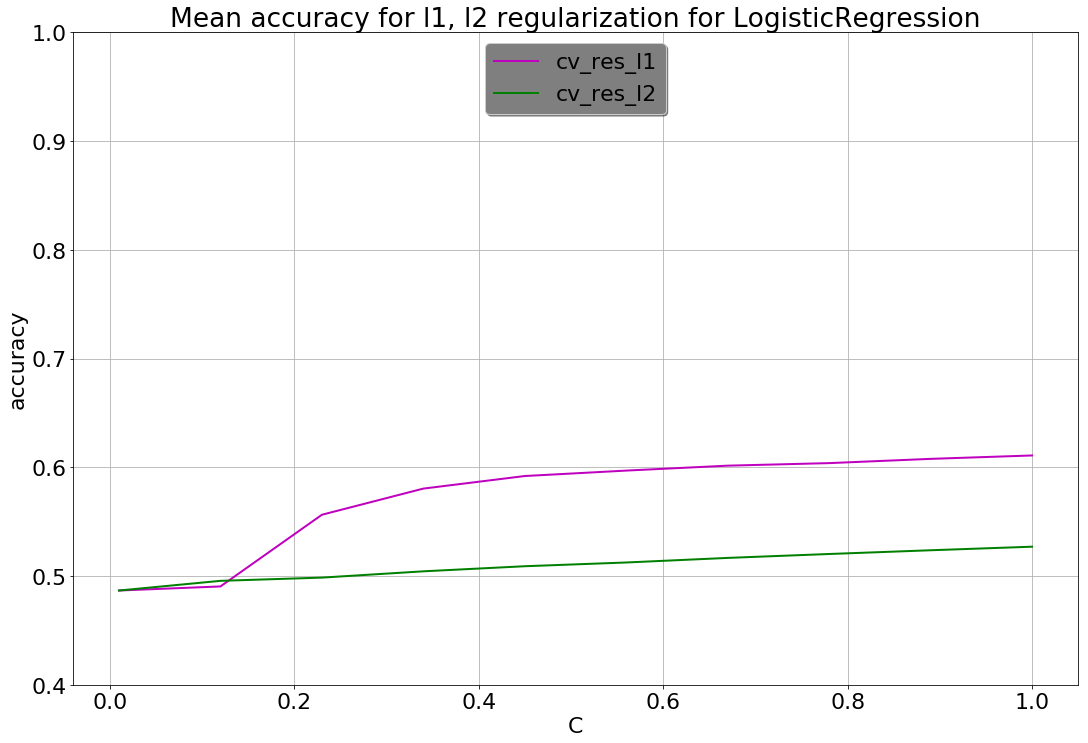

In [464]:
from matplotlib import pyplot as plt


cv_res_l1 = np.array([i for i in clf_gs_lr.cv_results_['mean_test_score'][0::2]])
cv_res_l2 = np.array([i for i in clf_gs_lr.cv_results_['mean_test_score'][1::2]])

fig, ax = plt.subplots(figsize=(18, 12))
plt.plot(C, cv_res_l1, 'm-', linewidth=2, label='cv_res_l1')
plt.plot(C, cv_res_l2, 'g-', linewidth=2, label='cv_res_l2')

plt.grid()
plt.ylim((0.4, 1))
plt.rcParams.update({'font.size': 22})

plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('Mean accuracy for l1, l2 regularization for LogisticRegression')
legend = ax.legend(loc='upper center', shadow=True)
legend.get_frame().set_facecolor('C7')

plt.show()


Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [465]:
C_best = clf_gs_lr.best_estimator_.get_params()['C']
penalty_best = clf_gs_lr.best_estimator_.get_params()['penalty']
print('Best Penalty:', penalty_best)
print('Best C:', C_best)

Best Penalty: l1
Best C: 1.0


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [466]:
best_lr_clf = LogisticRegression(penalty=penalty_best, \
                                 C=C_best, solver='saga',\
                                 multi_class='multinomial',\
                                 max_iter=6000)
best_lr_clf.fit(train_feature_matrix, train_labels) 
predictions_P = best_lr_clf.predict_proba(test_feature_matrix)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [467]:
p_labels = np.mean(predictions_P, axis = 0)
train_labels_num = train_labels.shape[0]
p_labels_true = np.zeros(7)
print('P на основе частот', '\t','P предсказанные')
for i in range(1,8):
    p_labels_true[i-1] = (np.round(train_labels[train_labels == i].shape[0]\
                             /train_labels_num, 7))
    print(p_labels_true[i-1], '\t\t', np.round(p_labels[i-1],7))

P на основе частот 	 P предсказанные
0.3704688 		 0.3635295
0.4867188 		 0.4881029
0.0579688 		 0.0629253
0.004375 		 0.0044558
0.0176562 		 0.0178888
0.0296875 		 0.0299891
0.033125 		 0.0331087


Заметим, что вероятности почти совпадают

#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [503]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_feature_matrix, train_labels)
print(accuracy_score(test_labels, knn.predict(test_feature_matrix)))
knn_grid = {'n_neighbors': np.array(np.linspace(1, 10, 10), dtype='int'), 'weights':['uniform', 'distance']}

clf_neigh = GridSearchCV(knn, knn_grid, cv=7)
clf_neigh.fit(train_feature_matrix, train_labels)

print('Best Weights:', clf_neigh.best_estimator_.get_params()['weights'])
print('Best n neighbors:', clf_neigh.best_estimator_.get_params()['n_neighbors'])

0.59125
Best Weights: distance
Best n neighbors: 4


Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

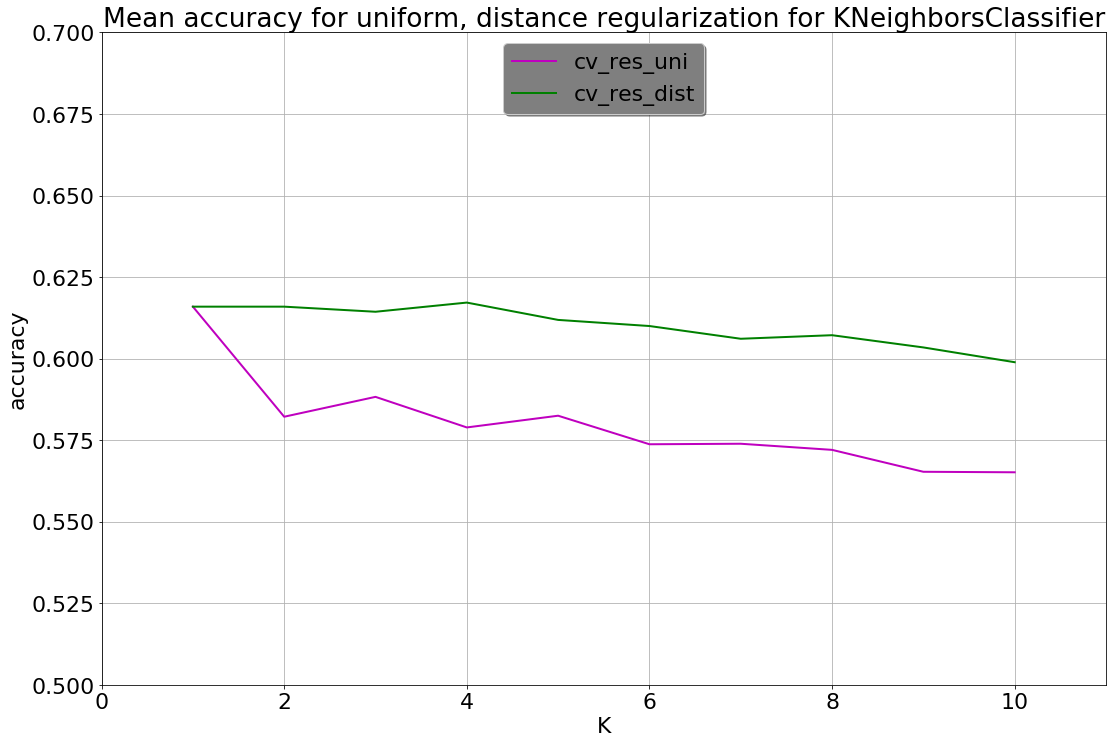

In [504]:
cv_res_uni = np.array([i for i in clf_neigh.cv_results_['mean_test_score'][0::2]])
cv_res_dist = np.array([i for i in clf_neigh.cv_results_['mean_test_score'][1::2]])

fig, ax = plt.subplots(figsize=(18, 12))
plt.plot(knn_grid['n_neighbors'], cv_res_uni, 'm-', linewidth=2, label='cv_res_uni')
plt.plot(knn_grid['n_neighbors'], cv_res_dist, 'g-', linewidth=2, label='cv_res_dist')

plt.grid()
plt.xlim((0, 11))
plt.ylim((0.5, 0.7))
plt.rcParams.update({'font.size': 22})

plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('Mean accuracy for uniform, distance regularization for KNeighborsClassifier')
legend = ax.legend(loc='upper center', shadow=True)
legend.get_frame().set_facecolor('C7')

plt.show()

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [505]:
neigh_best = KNeighborsClassifier(n_neighbors=4, weights='distance')
neigh_best.fit(train_feature_matrix, train_labels) 
neigh_best.predict_proba(test_feature_matrix)

array([[ 0.54270305,  0.45729695,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25094555,  0.50176794,  0.        , ...,  0.24728651,
         0.        ,  0.        ],
       [ 0.14935433,  0.85064567,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.31055505,  0.68944495,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.24757643,  0.75242357,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63429621,  0.36570379,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [506]:
dd_labels = delayed_data[delayed_data.columns[-1]].values
dd_feature_matrix = delayed_data[delayed_data.columns[:-1]].values
dd_feature_matrix_scaler = normalize(dd_feature_matrix)
neigh_best_prdct = neigh_best.predict(dd_feature_matrix_scaler)
best_lr_clf_prdct = best_lr_clf.predict(dd_feature_matrix_scaler)
print(accuracy_score(dd_labels, neigh_best_prdct))
print(accuracy_score(dd_labels, best_lr_clf_prdct))

0.652
0.6245
